In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('results.csv')
display(df)

,depth,fls,annotation,sample,iou,time,param
0,1.0,4.0,1.00,50.0,0.929560,2161.415431,1677.0
1,1.0,4.0,1.00,30.0,0.909426,3030.670150,1677.0
2,1.0,4.0,1.00,10.0,0.879774,3342.842634,1677.0
3,1.0,8.0,1.00,80.0,0.904185,210.467779,6489.0
4,1.0,8.0,1.00,50.0,0.912898,2274.643114,6489.0
...,...,...,...,...,...,...,...
253,4.0,16.0,0.57,76.0,0.619600,1.000000,1942289.0
254,4.0,16.0,0.67,76.0,0.708000,1.000000,1942289.0
255,4.0,16.0,0.77,76.0,0.799100,1.000000,1942289.0
256,4.0,16.0,0.84,50.0,0.865600,1.000000,1942289.0


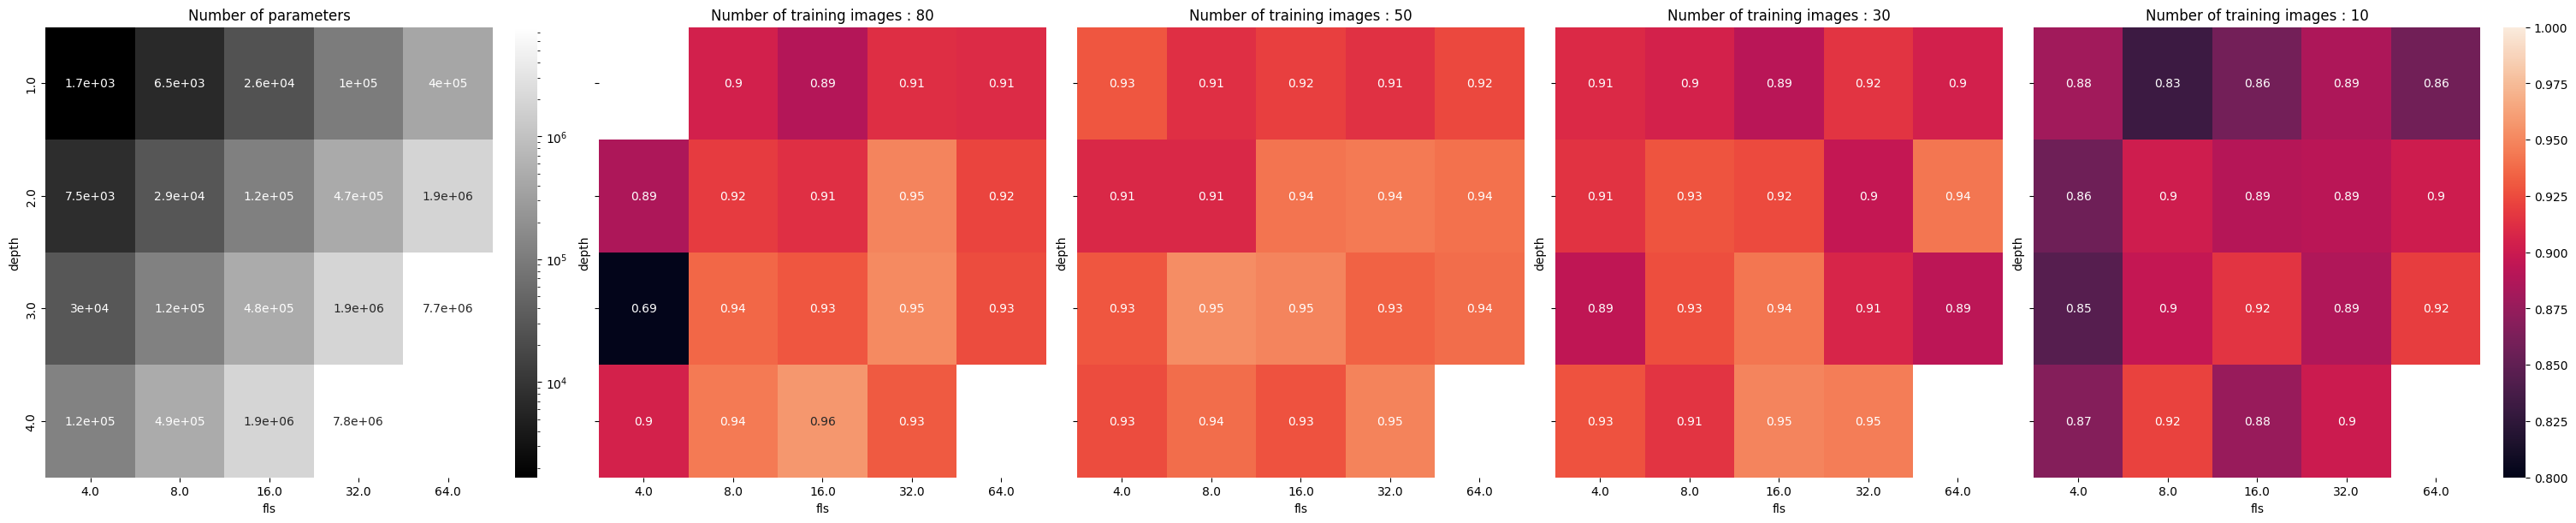

In [ ]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(1, 5, figsize=(30, 6), constrained_layout=True, sharex=True, sharey=True)
ax = ax.ravel()
idx_ax = 0
df_param = df.loc[(df['sample'] == 50) & (df['annotation'] == 1.0)]
d_param = df_param.pivot(index="depth", columns="fls", values="param")
ax[idx_ax].title.set_text(f"Number of parameters")
sns.heatmap(d_param, annot=True,ax=ax[idx_ax],cmap='gray',norm=LogNorm())
idx_ax+=1
for samples in [80,50,30,10]:
    df_sample = df.loc[(df['sample'] == samples) & (df['annotation'] == 1.0)]
    d = df_sample.pivot(index="depth", columns="fls", values="iou")
    if samples == 10:
        sns.heatmap(d, annot=True,ax=ax[idx_ax],vmin=0.8, vmax=1.0)
    else : 
        sns.heatmap(d, annot=True,ax=ax[idx_ax],vmin=0.8, vmax=1.0, cbar = False)
    
    ax[idx_ax].title.set_text(f"Number of training images : {samples}")
    idx_ax +=1
fig.savefig("plots/heatmap_depth_fls_1scale_param.png")


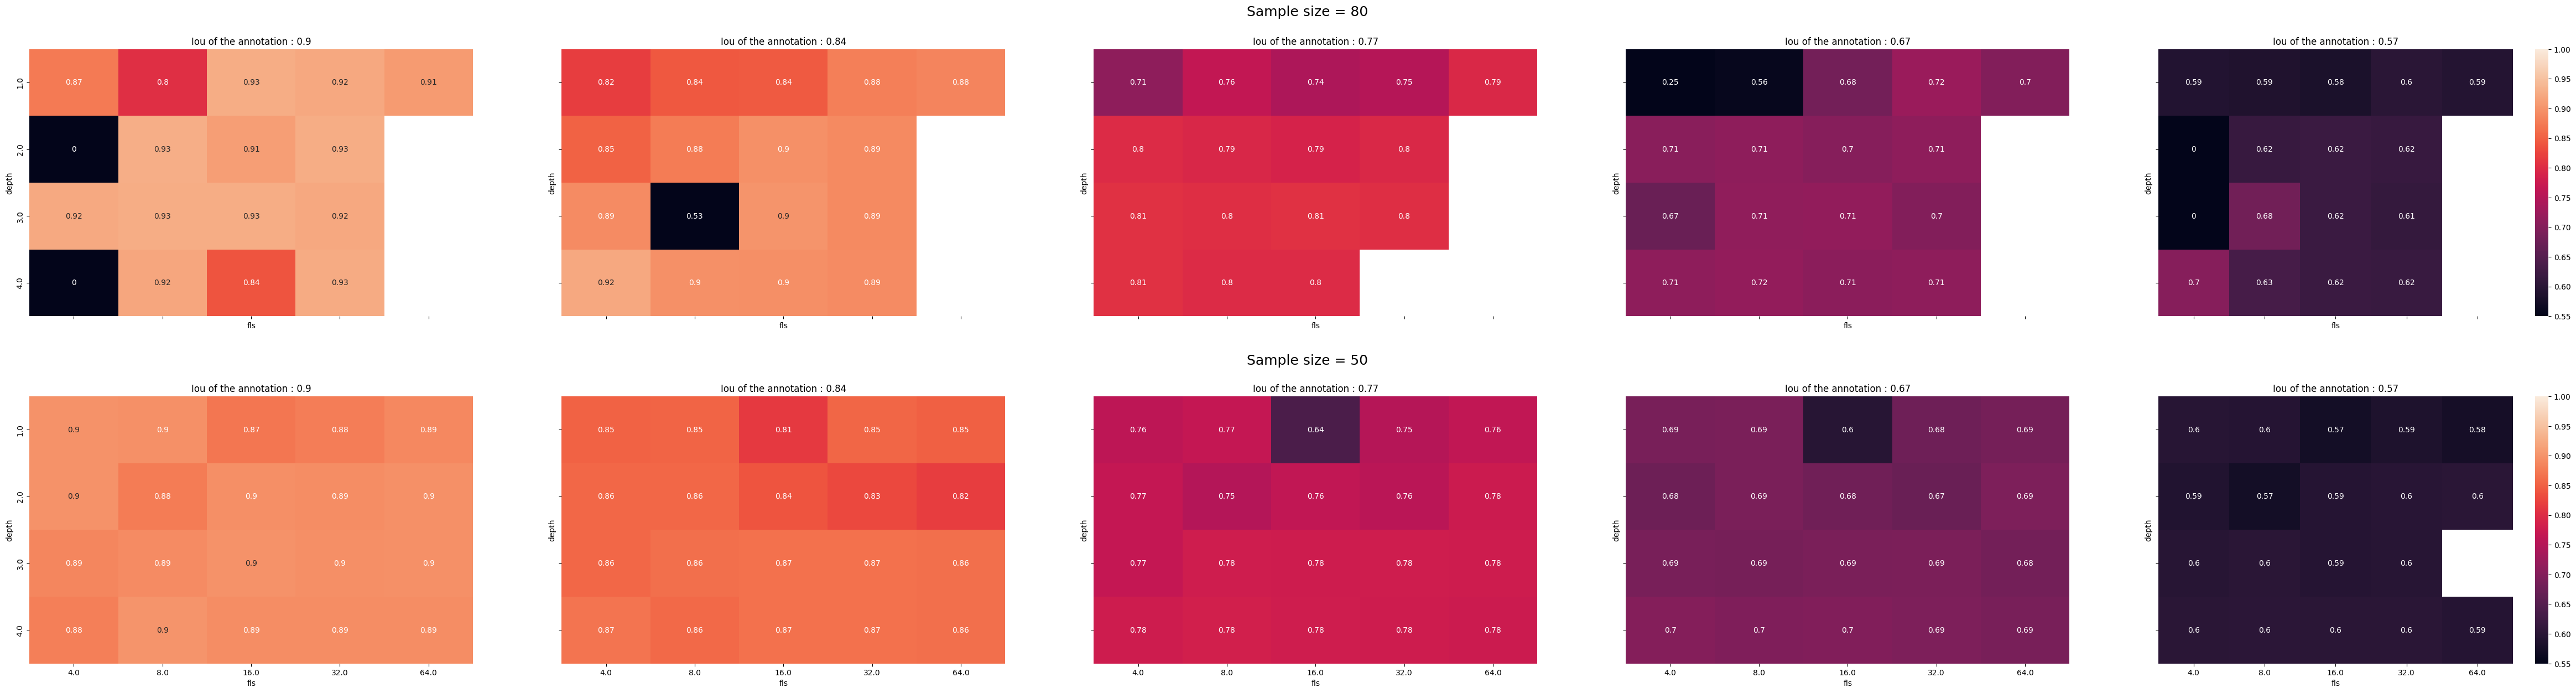

In [5]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(2, 5, figsize=(60, 15), sharex=True, sharey=True)
fig.subplots_adjust(top=0.85, hspace=0.30)

fig.text(0.51, 0.89, "Sample size = 80", ha="center", fontsize=18)
fig.text(0.51, 0.47, "Sample size = 50", ha="center", fontsize=18)
# fig, ax = plt.subplots(2, 5, figsize=(30, 6), constrained_layout=True, sharex=True, sharey=True)
ax = ax.ravel()
idx_ax = 0
for samples in [76,50]:
    for annotation in [0.9,0.84,0.77,0.67,0.57]:
        df_sample = df.loc[(df['sample'] == samples) & (df['annotation'] == annotation)]
        d = df_sample.pivot(index="depth", columns="fls", values="iou")
        if annotation == 0.57:
            sns.heatmap(d, annot=True,ax=ax[idx_ax],vmin=0.55, vmax=1.0)
        else : 
            sns.heatmap(d, annot=True,ax=ax[idx_ax],vmin=0.55, vmax=1.0, cbar = False)
        
        ax[idx_ax].title.set_text(f"Iou of the annotation : {annotation}")
        idx_ax +=1
fig.savefig("plots/heatmap_depth_fls_annotations_changes_scale.png")

C:\Users\Léa\AppData\Local\Temp\ipykernel_30956\1443251636.py:3: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(top=0.85, hspace=0.30)


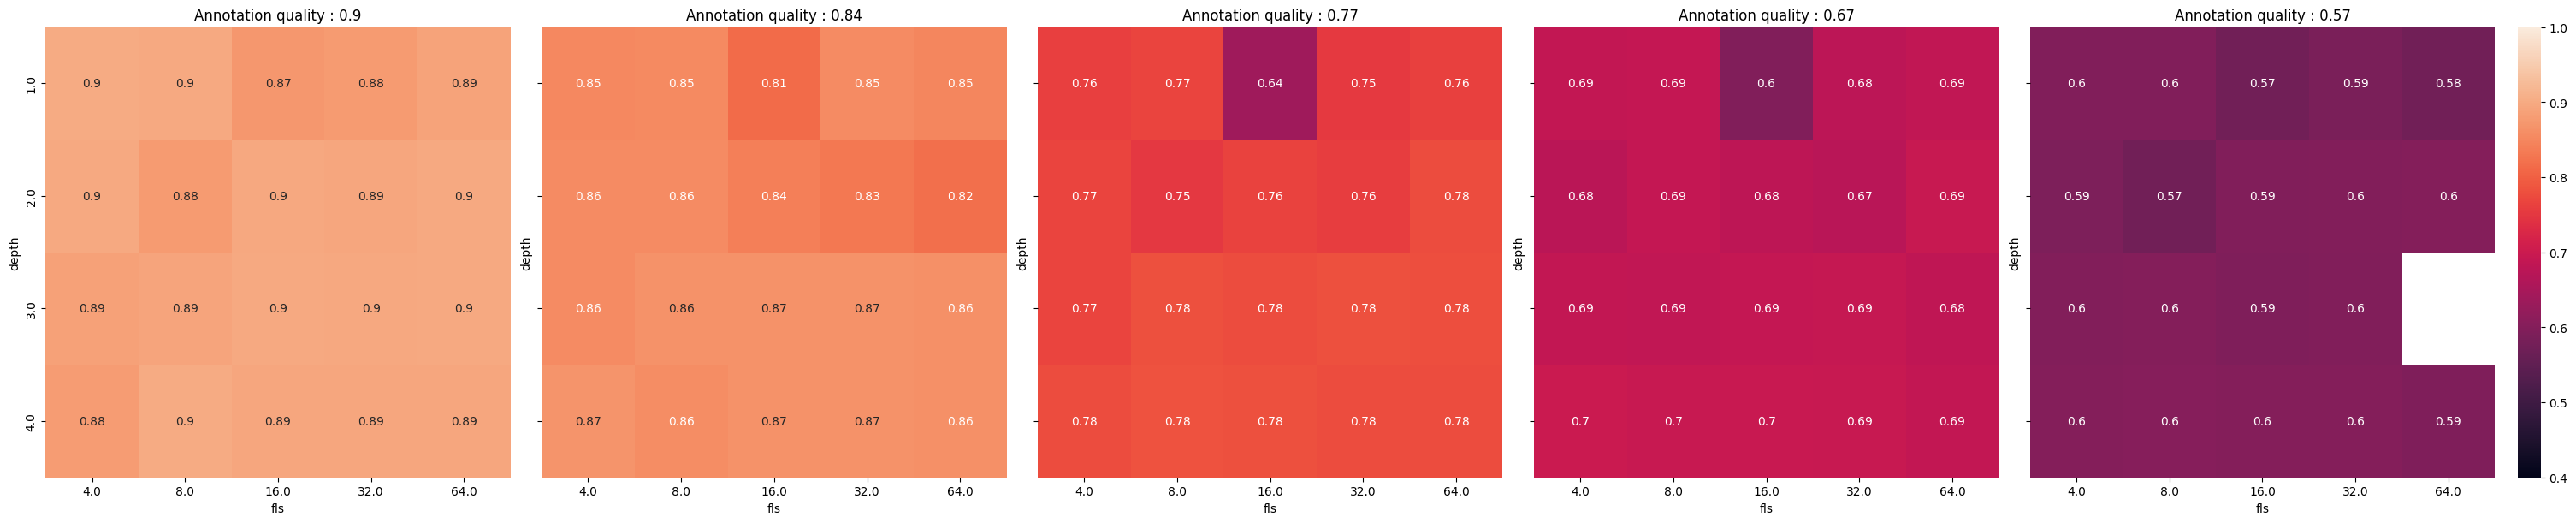

In [6]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(1, 5, figsize=(30, 6), constrained_layout=True, sharex=True, sharey=True)
fig.subplots_adjust(top=0.85, hspace=0.30)

# fig, ax = plt.subplots(2, 5, figsize=(30, 6), constrained_layout=True, sharex=True, sharey=True)
ax = ax.ravel()
idx_ax = 0
for annotation in [0.9,0.84,0.77,0.67,0.57]:
    df_sample = df.loc[(df['sample'] == 50) & (df['annotation'] == annotation)]
    d = df_sample.pivot(index="depth", columns="fls", values="iou")
    if annotation == 0.57:
        sns.heatmap(d, annot=True,ax=ax[idx_ax],vmin=0.4, vmax=1.0)
    else : 
        sns.heatmap(d, annot=True,ax=ax[idx_ax],vmin=0.4, vmax=1.0, cbar = False)
    
    ax[idx_ax].title.set_text(f"Annotation quality : {annotation}")
    idx_ax +=1
fig.savefig("plots/heatmap_depth_fls_annotations_only_50.png")